### Import of libraries requied for operation/ Импорт библиотек для работы

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = 'svg' 


from  sklearn.linear_model import LinearRegression
import scipy.stats as sc


import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='sklearn')



### Import data / Загружаем данные

In [3]:
data_a = pd.read_csv('/Users/egorkovalev/Downloads/DATA/archive/stores data-set.csv', index_col =False) # Stores
data_b = pd.read_csv('/Users/egorkovalev/Downloads/DATA/archive/Features data set.csv') # Features
data_c = pd.read_csv('/Users/egorkovalev/Downloads/DATA/archive/sales data-set.csv') # Sales

### About tables / О таблицах

In [4]:
data_a.head(3) # Stores

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [5]:
data_b.head(3) # Features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [6]:
data_c.head(3) # Sales

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False


### In-depth info about tables / Более углубленная информация о таблицах

In [7]:
for key, value in {'Stores': data_a, 'Features': data_b, 'Sales': data_c}.items():
    print(f'There is {value.shape[0]} rows and {value.shape[1]} columns in the table {key} ')


print('/')

for key, value in {'Stores': data_a, 'Features': data_b, 'Sales': data_c}.items():
    print(f'В таблице {value.shape[0]} строк {value.shape[1]} и {key} столбцов')

There is 45 rows and 3 columns in the table Stores 
There is 8190 rows and 12 columns in the table Features 
There is 421570 rows and 5 columns in the table Sales 
/
В таблице 45 строк 3 и Stores столбцов
В таблице 8190 строк 12 и Features столбцов
В таблице 421570 строк 5 и Sales столбцов


In [8]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
data_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [10]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [11]:
color=['darkslategray', 'darkcyan', 'lightseagreen', 'skyblue', 'teal', 'cadetblue', 'lightblue']

### Ratio of missing values per columns / Количество пропущенных значений в каждом столбце 

Text(0.5, 1.0, 'Ratio of missing values per columns')

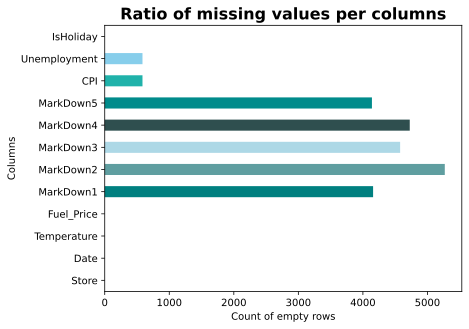

In [12]:
data_b.isnull().sum().plot.barh(color=color)
plt.xlabel('Count of empty rows')
plt.ylabel('Columns')
plt.title('Ratio of missing values per columns', fontsize=16, fontweight='bold')

The most common columns with empty values - Markdowns. Sometimes there aren't markdowns in stores.

Наиболее часто пустые значения встречаются в столбцах MarkDown. Это объясняется тем, что уценки бывают переодически. 

### About column Type in the table Stores/ О столбце Type в таблице Stores 

The letters A, B, C could correspond to different categories of stores. For example, A might represent grocery stores, B might represent clothing stores, and C might represent electronics stores.


Буквы A, B, C означают разные категории магазинов. К примеру, A - продуктовый тип магазина, B - магазин одежды, C - магазин электронной техники. 

### Data conversion to the required format / Преобразование данных в нужный формат

In [13]:
data_b.Date = pd.to_datetime(data_b.Date, format = '%d/%m/%Y')

In [14]:
data_b.sort_values(by = 'Date').head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2730,16,2010-02-05,19.79,2.580,NaN,NaN,NaN,NaN,NaN,189.381697,7.039,False
5460,31,2010-02-05,39.05,2.572,NaN,NaN,NaN,NaN,NaN,210.752605,8.324,False


In [15]:
data_b['Date_Y'] = data_b.Date.astype('str').str[:4].astype('int')
data_b["Date_M"] = data_b.Date.astype('str').str[:7]
data_b['Date_M'] = pd.to_datetime(data_b['Date_M'], format='%Y-%m')

In [16]:
data_b.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Date_Y,Date_M
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,2010-02-01
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010,2010-02-01
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2010,2010-02-01


In [17]:
data_c['Date'] = pd.to_datetime(data_c.Date, format='%d/%m/%Y')

### CPI change over time / Изменения CPI 

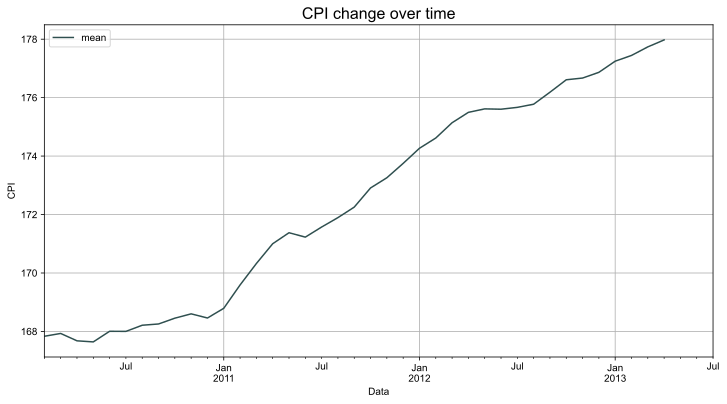

In [18]:
data_b.groupby('Date_M')['CPI'].agg(['mean']).plot.line(grid=True, figsize=(12, 6), color=color)
plt.title('CPI change over time', fontsize=16)
plt.xlabel('Data')
plt.ylabel('CPI')
plt.style.use('seaborn')

### Type to size / Тип магазина к его размеру

In [19]:
counts = data_a.Type.value_counts()
counts

A    22
B    17
C     6
Name: Type, dtype: int64

(array([0, 1, 2]), [Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C')])

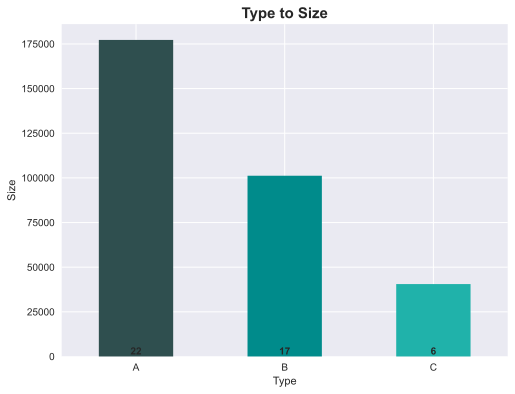

In [20]:
data_a.groupby('Type')['Size'].agg('mean').plot.bar(color=color, figsize=(8, 6))
plt.xlabel('Type')
plt.ylabel('Size')
plt.title('Type to Size', fontsize=15, fontweight='bold')

for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation = 0)



### Fuel price change over time / Изменение цены топлива 

Text(0.5, 1.0, 'Fuel price change over time')

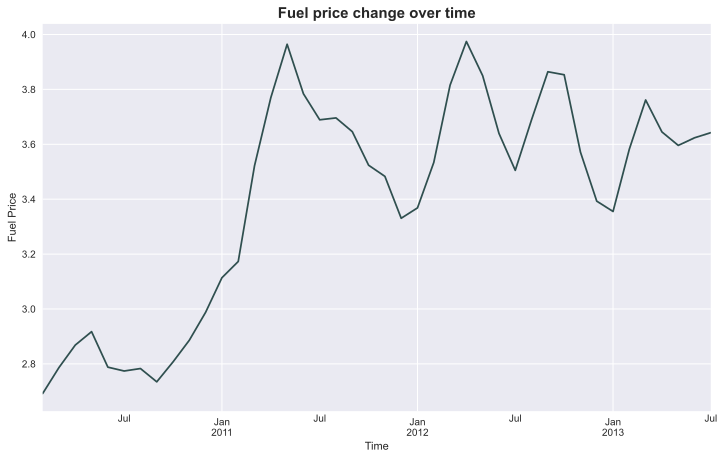

In [21]:
data_b.groupby('Date_M')['Fuel_Price'].agg('mean').plot.line(figsize=(12, 7), color=color)
plt.xlabel('Time')
plt.ylabel('Fuel Price')
plt.title('Fuel price change over time', fontsize=15, fontweight='bold')

### Creating a chart with sales / Создание графика с продажами

In [22]:
data_new_c = data_c.groupby(['Store', 'Date'])['Weekly_Sales'].agg('sum')
data_new_c = data_new_c.reset_index()
data_new_c.head(3)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17


In [23]:
data_new_c['Date'] = pd.to_datetime(data_new_c['Date'], format='%d/%m/%Y')
data_new_c = data_new_c.sort_values(['Store', 'Date'])
data_new_c.head(3)

,Store,Date,Weekly_Sales
0,1,2010-02-05,1643690.90
1,1,2010-02-12,1641957.44
2,1,2010-02-19,1611968.17


In [24]:
data_new_c['Date_M'] = data_new_c['Date'].astype('str').str[:7]
data_new_c['Date_M'] = pd.to_datetime(data_new_c['Date_M'], format='%Y-%m')

data_new_c.head(3)


,Store,Date,Weekly_Sales,Date_M
0,1,2010-02-05,1643690.90,2010-02-01
1,1,2010-02-12,1641957.44,2010-02-01
2,1,2010-02-19,1611968.17,2010-02-01


Text(0.5, 1.0, 'Sales Chart')

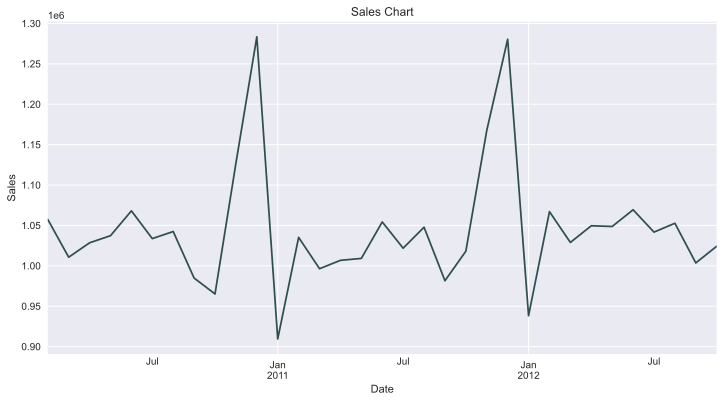

In [25]:
data_new_c.groupby('Date_M')['Weekly_Sales'].agg('mean').plot.line(grid= 1, figsize=(12, 6), color=color)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Chart')


#### **Conclusion**

We can see the cycle. Before New Year's Eve, all departments in the store see an increase in sales. 
Before other holidays we can see a slight increase in sales. 

#### Before the holiday we can:

1. Increase inventory of popular, in-demand items.

2. Intensify marketing and advertising efforts to attract customers and stimulate purchases. 

- We can use customer segmentation to create groups. For example, we have a group of customers. They actively buy before the holidays, but after the holidays they are not active. We can create a special offer for this group

#### And we may see poor sales after the New Year. I can suggest:

- About customer retention and special offers. It's so important because customer can find your store, buy something and forget. But if you offer something good and favorable, customer can remember your store and share it with his family/friends. 

#### **Вывод**

Мы можем увидеть цикл. Перед Новогодними праздниками, во всех отделах растут продажи. Перед другими праздниками мы также можем увидеть небольшой рост. 

#### Перед праздниками мы можем:

1. Проанализировать продажи за прошлые годы, пополнить инвентарь популярными продуктами, чтобы не было проблем с достатком вещей на складе.

2. Усилить маркетинг чтобы привлекать покупателей и стимулировать их на покупки. 

- Мы можем использовать сегментацию по покупателям для создания групп. Например, у нас есть группа покупателей. Эта группа активна перед праздниками, но после праздников их активность падает. Мы можем создать специальное предложение для этой группы.

#### И мы можем увидеть слабые продажи после праздников. Я могу предложить:

- О возврате покупателя и специальных предложениях. Это очень важно, потому что покупатель может купить что-то и забыть про этот магазин. Но если вы предложите покупателю что-то выгодное для него, он может запомнить ваш магазин и рассказывать о нём друзьям. 


### Each store's sales / Продажи на каждый магазин

Text(0.5, 1.0, "Each store's sales")

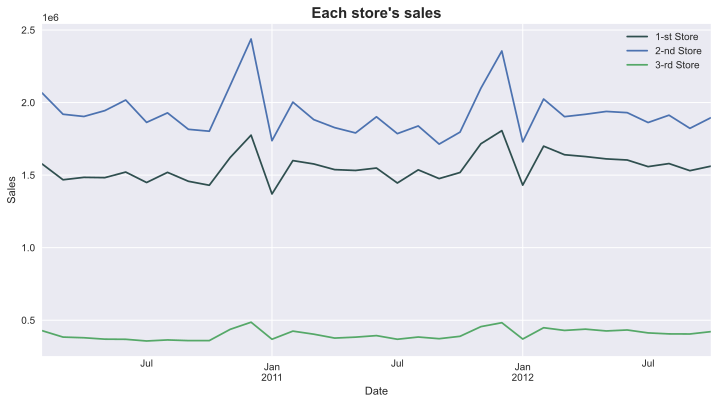

In [26]:
data_new_c[data_new_c.Store == 1].groupby('Date_M')['Weekly_Sales'].agg('mean').plot.line(figsize=(12, 6), color = color)
data_new_c[data_new_c.Store == 2].groupby('Date_M')['Weekly_Sales'].agg('mean').plot.line()
data_new_c[data_new_c.Store == 3].groupby('Date_M')['Weekly_Sales'].agg('mean').plot.line()
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(['1-st Store', '2-nd Store', '3-rd Store'])
plt.title("Each store's sales", fontsize=15, fontweight='bold')

### Corelation between Size of Store and Sales / Взаимосвязь между размером магазина и продажами

I want to open my store. And i have data on the size and sales of the stores. And i trained a simple linear regression model. And all i need after trainee it's inputting size of my store and i can see my sales.


Я хочу открыть свой магазин. у меня есть данные о размерах и продажах магазинов. Я обучаю модель на простую линейную регрессию. Всё, что нужно после обучения - вписать размеры моего магазина и я смогу увидеть мои продажи.

In [27]:
data_sec_hundred = data_new_c[data_new_c['Date'] == '2010-03-05']

In [28]:
data_full = pd.merge(left = data_a, right = data_sec_hundred, on='Store', how='inner')
data_full = data_full[['Store', 'Size', 'Weekly_Sales']]
data_full.head()

,Store,Size,Weekly_Sales
0,1,151315,1554806.68
1,2,202307,1991013.13
2,3,37392,415202.04
3,4,205863,1971057.44
4,5,34875,288855.71


In [29]:
x = pd.DataFrame(data_full['Size'])
y = pd.DataFrame(data_full['Weekly_Sales'])

### I created a function, we need to input data and we can see corellation between data. / Я создал функцию, нам нужно ввести данные и мы сможем увидеть взаимосвязь между данными 

In [30]:
def martix_corr(df):
    df_corr = df.corr()
    plt.figure(figsize=(5, 12))
    plt.matshow(df_corr, cmap='viridis')


    plt.colorbar()


    plt.xticks(range(len(df_corr.columns)), df_corr, rotation=90)
    plt.yticks(range(len(df_corr.columns)), df_corr)


    plt.gca().xaxis.tick_bottom()
    plt.title('Corellation', fontsize=15, fontweight='bold');

<Figure size 500x1200 with 0 Axes>

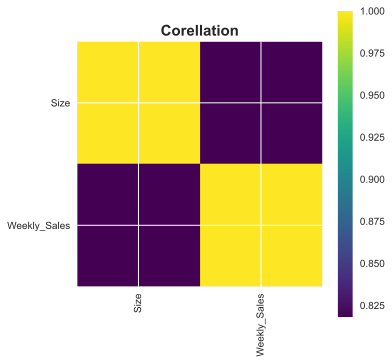

In [31]:
martix_corr(data_full[['Size', 'Weekly_Sales']])

In [32]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

Text(0, 0.5, 'Sales')

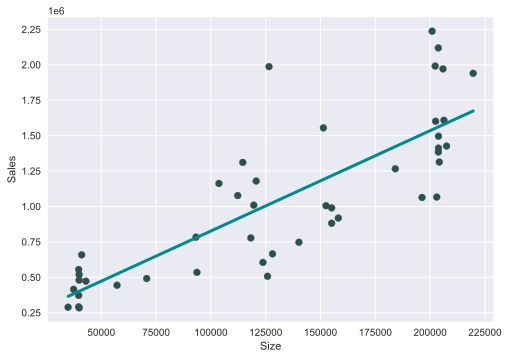

In [33]:
plt.scatter(x=x, y=y, color='darkslategrey')



plt.plot(x, model.predict(x), color='darkcyan', linewidth=3)
plt.xlabel('Size')
plt.ylabel('Sales')

 model accuracy / точность модели

In [34]:
model.score(x, y) 

0.669116206493841

Predict data / Прогнозирование данных

In [35]:
res = model.predict([[165000]])
res[0][0].round(2)

1287453.78

I have probability 67%. It's not many, but i have result. We can spot - if i have size of store 165000, Sales can be about 1287453.78


Точность модели - 67%. Это не сильно много, но у меня есть результат. Получается, если я сделаю магазин размером 165000, продажи будут 1287453.78.

### Start analysis MarkDown1 and MarkDown2 / Начало анализа уценок первой и второй категории

- #### MarkDown1

#### I create a function / Я создал функцию



In [36]:
def markdown_analysis(markdown): #Column of MarkDown. Ex: 'MarkDown1'
    df = pd.merge(data_b, data_c, on=['Store', 'Date', 'IsHoliday'], how='inner')[['Dept', 'Weekly_Sales', markdown]]

    df_without = df[df[markdown].isna()].groupby('Dept')['Weekly_Sales'].agg('mean').reset_index()
    df_without.rename(columns={'Weekly_Sales': 'Sales_Without'}, inplace=True)

    df_with = df.dropna().groupby('Dept')[['Weekly_Sales']].agg('mean')
    df_with = df_with.reset_index()
    df_with.rename(columns={'Weekly_Sales': 'Sales_With'}, inplace=True)

    df = pd.merge(df_without, df_with, on='Dept', how='inner')
    df['Difference'] = (df.Sales_With - df.Sales_Without) / abs(df.Sales_Without) * 100
    df.sort_values(by='Difference', ascending=False, inplace=True)

    return df.round(2)

    

 We need to input name of MarkDown ('MarkDown1'-'MarkDown5'), and we can see information about sales, when MarkDown is actual/ non actual 




 Нам нужно ввести название уценки и мы сможем увидеть информацию о продажах, когда уценка действовала/ не действовала 

In [37]:
# The most biggest Difference / Самая большая разница 

data_md = markdown_analysis('MarkDown1')
data_md[data_md.Difference > 100]

,Dept,Sales_Without,Sales_With,Difference
62,77,-5.93,347.83,5963.11
80,99,144.17,511.32,254.66
45,47,-16.81,9.51,156.59
37,39,6.49,13.91,114.38


#### Sales With and Without Markdown / Продажи с и без уценки

Text(0.5, 1.0, 'Sales With and Without MarkDown by Department')

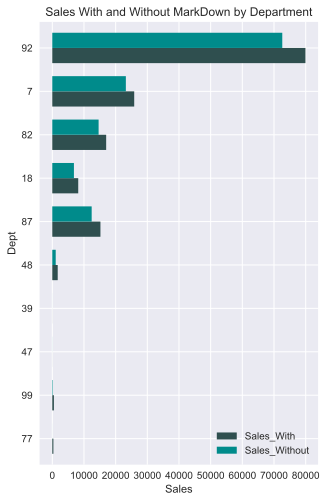

In [38]:
data_md.head(10).sort_values(by='Difference', ascending=False).plot.barh(x='Dept', y=['Sales_With', 'Sales_Without'], figsize=(5, 8), width=0.7, color=color)
plt.xlabel('Sales')
plt.ylabel('Dept')
plt.title('Sales With and Without MarkDown by Department')


#### Different calculating to make a conclusion / Различные вычисления для вывода

In [39]:
len(data_md[data_md.Difference < 0]) # Count of Departments less then 0

35

In [40]:
data_md[data_md.Difference < 0][-5:]

,Dept,Sales_Without,Sales_With,Difference
55,59,776.10,531.99,-31.45
63,78,7.88,5.25,-33.31
41,43,1.55,0.94,-39.45
51,54,138.19,45.57,-67.03
49,51,23.04,6.46,-71.96


In [41]:
data_md[data_md.Difference < 0][-5:].Dept.values

array([59, 78, 43, 54, 51])

In [42]:
data_md[1:11].Difference.sum() # Sum of ten departments with the biggest difference

671.66

In [43]:
data_md.sort_values(by='Difference').head(10).Difference.sum() # Sum of ten departments with the smallest difference

-317.36

In [44]:
data_md[data_md.Sales_With > 10000].sort_values(by='Sales_With')['Difference'].agg('mean') # Mean value of growt

2.511081081081081

In [45]:
data_md[data_md.Dept != 77].Difference.mean()

4.725875000000003

In [46]:
data_md[['Sales_Without', 'Sales_With']].agg('sum').sum() * 0.05

113996.346

This function calculate difference in show sales and good or bad influence have markdown / Эта функция считает разницу в продажах и показывает хорошее или плохое влияние оказывает уценка

In [47]:
def difference_sales(df):
    
    less = (df[df.Difference < 0].Sales_Without - df[df.Difference < 0].Sales_With).sum()
    more = (df[df.Difference > 0].Sales_With - df[df.Difference > 0].Sales_Without).sum()

    print(f'In some departments we take {more.round()} and lose {less.round()}')

    if more > less:
        print('Sales with this markdown have good effect. We have', (more - less).round(), 'value difference')
    else:
        print('Sales with this markdown have bad effect. We have', (less - more).round(), 'value difference')
    
    print()

    print(f'В некоторых отделах мы получили {more.round()} и потеряли {less.round()}')

    if more > less:
        print('Продажи с данной уценкой оказывают положительный эффект. Мы получили', (more - less).round())
    else:
        print('Продажи с данной уценкой имеют негативный эффект, мы получили минус в', (less - more).round())

In [48]:
difference_sales(data_md)

In some departments we take 39023.0 and lose 14614.0
Sales with this markdown have good effect. We have 24409.0 value difference

В некоторых отделах мы получили 39023.0 и потеряли 14614.0
Продажи с данной уценкой оказывают положительный эффект. Мы получили 24409.0


**Conclusion**: 

- The most significant improvement we have in 77-th Department. We have good improvement in 99, 47, 39 departments.

- But we have 35 negative-influence values. 

- The worthest influence of markdown been in 59, 78, 43, 54, 51 Departaments


I added up the first 10 numbers of the percentage change with good growth. But I didn't include the first number with 5963% growth. And I added up the last 10 departments with the biggest drop. 
 
 And my conclusion is a good effect. Because the percentage of growth is twice as much as the decline. And we have 300% growth. In the high growth departments, we have an average growth of 2.5%. In most cases, the departments with the highest decline are the departments with the lowest sales.
 
  The average percentage difference is ~5. This is a good result. In numbers, it's about 100000.


  





**Вывод**: 

- Самое значительное улучшение наблюдается у 77-го отдела. Также хороший результат у 99, 47, 39 отдела.

- Мы имеем 35 значений, у которых наблюдается ухудшение или они остаются без изменений. 

- Худший результат мы видим у 59, 78, 43, 54, 51 отделов.

- Средняя улучшение у отделов - 5%. 

Я сложил первые 10 чисел процентов положительного роста, не добавляя число с 5963 процентами роста. Также я сложил 10 чисел с самым большим падением.
 
 Мой вывод - хороший эффект. Так как процент роста в два раза больше процента падения. И у нас есть 300% роста продаж. В отделах с самыми большими продажами мы имеем в 2-10% роста. В большинстве случаев, самые большие падения у отделов с самыми низкими продажами.
 
  

- ### MarkDown2:

In [49]:
data_md = markdown_analysis('MarkDown2')
data_md.head()

,Dept,Sales_Without,Sales_With,Difference
80,99,172.13,581.04,237.55
45,47,-16.91,14.62,186.49
62,77,147.58,361.81,145.16
46,48,1177.22,1685.20,43.15
70,87,12192.89,16982.20,39.28


In [50]:
data_md.sort_values(by='Difference', ascending=False).head(10)

,Dept,Sales_Without,Sales_With,Difference
80,99,172.13,581.04,237.55
45,47,-16.91,14.62,186.49
62,77,147.58,361.81,145.16
46,48,1177.22,1685.20,43.15
70,87,12192.89,16982.20,39.28
37,39,9.70,13.49,39.05
6,7,22309.63,29588.26,32.63
67,82,14364.21,18709.58,30.25
16,18,6773.78,8789.56,29.76
2,3,11088.79,13859.76,24.99


In [51]:
data_md.sort_values(by='Sales_With', ascending=False).head(10).Difference.mean() # Values with MarkDown have 10% growth

10.959

In [52]:
data_md.sort_values(by='Sales_With').head(10) # Values with MarkDown have 10% growth

,Dept,Sales_Without,Sales_With,Difference
41,43,1.38,1.01,-26.42
63,78,7.75,5.32,-31.35
49,51,22.83,5.75,-74.81
37,39,9.70,13.49,39.05
45,47,-16.91,14.62,186.49
43,45,23.01,24.07,4.61
51,54,129.84,46.44,-64.23
56,60,352.09,335.38,-4.75
62,77,147.58,361.81,145.16
80,99,172.13,581.04,237.55


In [53]:
data_md.sort_values(by='Sales_With').head(10).Difference.mean()

41.13

In [54]:
len(data_md[data_md.Difference < 0])

19

In [55]:
data_md[data_md.Difference < 0][-5:]

,Dept,Sales_Without,Sales_With,Difference
53,56,4082.58,3158.82,-22.63
41,43,1.38,1.01,-26.42
63,78,7.75,5.32,-31.35
51,54,129.84,46.44,-64.23
49,51,22.83,5.75,-74.81


In [56]:
data_md[data_md.Difference < 0][-5:].Dept.values

array([56, 43, 78, 54, 51])

In [57]:
difference_sales(data_md)

In some departments we take 132719.0 and lose 8213.0
Sales with this markdown have good effect. We have 124505.0 value difference

В некоторых отделах мы получили 132719.0 и потеряли 8213.0
Продажи с данной уценкой оказывают положительный эффект. Мы получили 124505.0


**Conclusion:**

I analyze MarkDown2 the same way I analyze MarkDown1. In the departments with large sales we have a 10% increase. As with MarkDown1, the most significant percentage difference is in the departments with small sales.

- The departments with the largest effect are 99, 47, 77
- We see 19 negative values. 
- 124505 сash on the plus side.

We have the smallest effect in departments 56, 43, 78, 54, 51. In MarkDown1 we saw 78, 43, 54, 51. And this may suggest that we should remove markdown in these departments.

This means that MarkDown2 has a good effect in more departments than MarkDown1. 

**Вывод:**

В отделах с большими продажами средний рост - 10%. Как и в случае с MarkDown1, наиболее сильные падения в отделах с маленькими продажами.

- Отделы с самым большим положительным эффектом - 99, 47, 77
- 19 отделов с негативным эффектом. 
- 124505 денежных средств в плюсе из-за положительного влияния уценок.

Самый негативный эффект уценка оказала у 56, 43, 78, 54, 51 отделов. В MarkDown1 мы уже видели эти отделы: 78, 43, 54, 51. Предложение - изменить или убрать уценки у данных отделов .

MarkDown2 оказывает более хороший эффект, чем MarkDown1. 